In [1]:
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import googletrans
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt

import random
from nltk.corpus import movie_reviews

import pickle 
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode

In [2]:
df=pd.read_csv('data_ryan.csv')

In [3]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views
0,Easy DIY Science Experiment for Kids Rainbow S...,Ryan's World,Easy DIY Science Experiment for Kids Rainbow S...,2021-01-24T13:00:02Z,"[""Ryan's World"", 'Ryan ToysReview', 'science e...",1503,399,200970
1,Ryan play with Giant Soccer Ball and Learn abo...,Ryan's World,Ryan play with Giant Soccer Ball and Learn abo...,2021-01-23T13:00:32Z,"[""Ryan's World"", 'force', 'force and motion', ...",2434,626,331667
2,Ryan hides the Golden Egg from King Collectors...,Ryan's World,Ryan hides the Golden Egg from King Collectors...,2021-01-22T13:00:22Z,"[""Ryan's World"", 'Pretend play', 'Combo Panda'...",2469,605,332385
3,Dancing Corn Easy DIY Science Experiments for ...,Ryan's World,Dancing Corn Easy DIY Science Experiments for ...,2021-01-20T13:00:13Z,"[""Ryan's World"", 'Ryan ToysReview', 'dancing c...",7228,2360,1587332
4,Ryan does DIY Science Experiments with Emma an...,Ryan's World,Ryan does DIY Science Experiments with Emma an...,2021-01-18T13:00:29Z,"[""Ryan's World"", 'Ryan ToysReview', 'DIY scien...",16552,6395,4411698


In [4]:
# tags wordcloud
tag_words = '' 
stopwords = set(STOPWORDS)
#print(stopwords)

In [5]:
# iterate through the csv file 
for val in df.tags: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    tag_words += " ".join(tokens)+" "

In [6]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tag_words) 

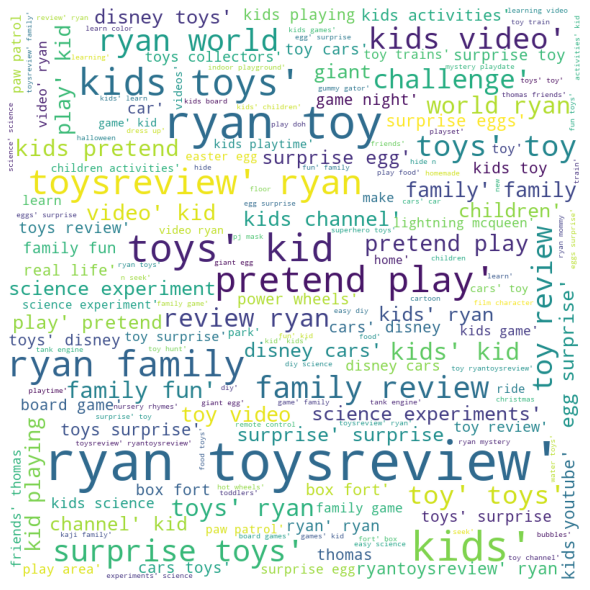

In [7]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [8]:
# title wordcloud
title_words = ''

In [9]:
# iterate through the csv file 
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    title_words += " ".join(tokens)+" "

In [10]:
val

'Kid playing with toys Lego Duplo Number Train'

In [11]:
wordcloud_title = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(title_words) 

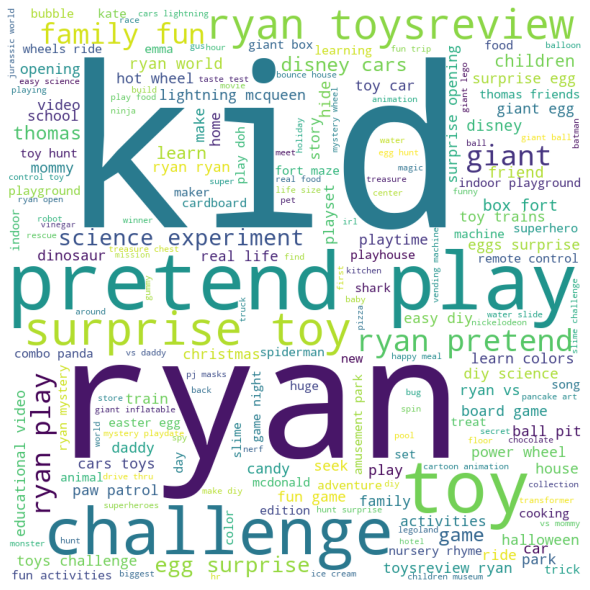

In [12]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_title) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [13]:
#word_data = df.title
#nltk_tokens = nltk.word_tokenize(word_data)  	

print(list(nltk.bigrams(df.tags))[:3])

[('["Ryan\'s World", \'Ryan ToysReview\', \'science experiments\', \'kids science experiments\', \'science experiments for kids\', \'easy DIY science experiments\', \'easy DIY science experiments for kids\', \'snowstorm in a jar\', \'rainbow science experiments\', \'oil and water experiments\', \'kids science video\']', '["Ryan\'s World", \'force\', \'force and motion\', \'learn about force\', \'what is a force\', \'push or pull\', \'science video\', \'kids science video\', \'kids learning video\', \'science preschooler\', \'kids video\', \'educational video\', \'educational video for kids\', \'kids educational video\', \'Kindergarten learning video\']'), ('["Ryan\'s World", \'force\', \'force and motion\', \'learn about force\', \'what is a force\', \'push or pull\', \'science video\', \'kids science video\', \'kids learning video\', \'science preschooler\', \'kids video\', \'educational video\', \'educational video for kids\', \'kids educational video\', \'Kindergarten learning video

In [14]:
print(list(nltk.bigrams(df.title))[:3])

[('Easy DIY Science Experiment for Kids Rainbow Snowstorm in a Jar!!!', 'Ryan play with Giant Soccer Ball and Learn about Force and Motion for kids!!'), ('Ryan play with Giant Soccer Ball and Learn about Force and Motion for kids!!', 'Ryan hides the Golden Egg from King Collectors with Combo Panda!!!'), ('Ryan hides the Golden Egg from King Collectors with Combo Panda!!!', 'Dancing Corn Easy DIY Science Experiments for kids to do at home!!')]


In [15]:
print(title_words[:20])

easy diy science exp


In [16]:
tokenized_title=word_tokenize(title_words)
print(tokenized_title[:10])

['easy', 'diy', 'science', 'experiment', 'for', 'kids', 'rainbow', 'snowstorm', 'in', 'a']


In [17]:
#nltk.download('punkt')

In [18]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_title)
print(fdist)

<FreqDist with 2117 samples and 22249 outcomes>


In [19]:
fdist.most_common(5)

[('!', 2509), ('ryan', 1076), ('with', 813), ('kids', 620), ('for', 618)]

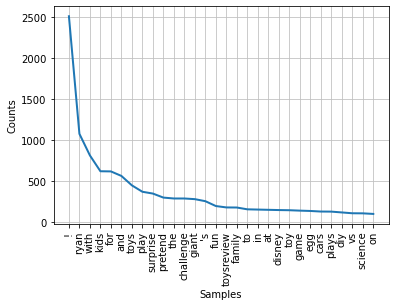

In [20]:
# Frequency Distribution Plot - TITLE
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [21]:
print(tag_words[:45])

["ryan's world", 'ryan toysreview', 'science 


In [22]:
tokenized_tag=word_tokenize(tag_words)
print(tokenized_tag[:5])

['[', '``', 'ryan', "'s", 'world']


In [23]:
fdist_tag = FreqDist(tokenized_tag)
print(fdist_tag)

<FreqDist with 4287 samples and 172093 outcomes>


In [24]:
fdist_tag.most_common(5)

[(',', 36134), ("'", 35105), ("'kids", 4477), ('toys', 3519), ('``', 3041)]

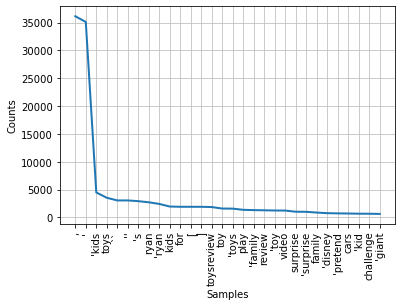

In [25]:
# Frequency Distribution Plot - TITLE
fdist_tag.plot(30,cumulative=False)
plt.show()

In [26]:
stopwords.update(['!','ryan','kids','toys','play','?',"ryan's",'1'])

In [27]:
filtered_sent=[]
for w in tokenized_title:
    if w not in stopwords:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_title[:20])
print("Filterd Sentence:",filtered_sent[:20])

Tokenized Sentence: ['easy', 'diy', 'science', 'experiment', 'for', 'kids', 'rainbow', 'snowstorm', 'in', 'a', 'jar', '!', '!', '!', 'ryan', 'play', 'with', 'giant', 'soccer', 'ball']
Filterd Sentence: ['easy', 'diy', 'science', 'experiment', 'rainbow', 'snowstorm', 'jar', 'giant', 'soccer', 'ball', 'learn', 'force', 'motion', 'hides', 'golden', 'egg', 'king', 'collectors', 'combo', 'panda']


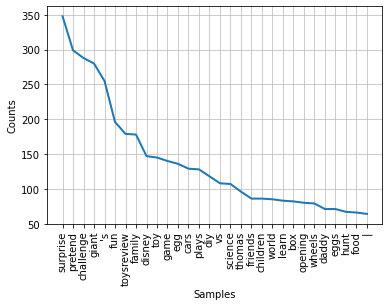

In [28]:
fdist_flt = FreqDist(filtered_sent)
fdist_flt.plot(30,cumulative=False)
plt.show()

In [29]:
df['filtered_title']=np.empty((len(df), 0)).tolist()
#removing stopwords from TITLE
for i in range(len(df.title)):
    # typecaste each val to string 
    row = str(df.title[i])
    tokenized_row=word_tokenize(row)
    filtered_sent=[]
    for w in tokenized_row:
        w=w.lower()
        if w not in stopwords:
            filtered_sent.append(w)
    df.filtered_title[i]=filtered_sent

C:\Users\Brainz\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [30]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title
0,Easy DIY Science Experiment for Kids Rainbow S...,Ryan's World,Easy DIY Science Experiment for Kids Rainbow S...,2021-01-24T13:00:02Z,"[""Ryan's World"", 'Ryan ToysReview', 'science e...",1503,399,200970,"[easy, diy, science, experiment, rainbow, snow..."
1,Ryan play with Giant Soccer Ball and Learn abo...,Ryan's World,Ryan play with Giant Soccer Ball and Learn abo...,2021-01-23T13:00:32Z,"[""Ryan's World"", 'force', 'force and motion', ...",2434,626,331667,"[giant, soccer, ball, learn, force, motion]"
2,Ryan hides the Golden Egg from King Collectors...,Ryan's World,Ryan hides the Golden Egg from King Collectors...,2021-01-22T13:00:22Z,"[""Ryan's World"", 'Pretend play', 'Combo Panda'...",2469,605,332385,"[hides, golden, egg, king, collectors, combo, ..."
3,Dancing Corn Easy DIY Science Experiments for ...,Ryan's World,Dancing Corn Easy DIY Science Experiments for ...,2021-01-20T13:00:13Z,"[""Ryan's World"", 'Ryan ToysReview', 'dancing c...",7228,2360,1587332,"[dancing, corn, easy, diy, science, experiment..."
4,Ryan does DIY Science Experiments with Emma an...,Ryan's World,Ryan does DIY Science Experiments with Emma an...,2021-01-18T13:00:29Z,"[""Ryan's World"", 'Ryan ToysReview', 'DIY scien...",16552,6395,4411698,"[diy, science, experiments, emma, kate, ek, do..."


Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [31]:
#Lexicon Normalization
#performing Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Brainz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
df['lem_title']=np.empty((len(df), 0)).tolist()
for i in range(len(df.title)):
    lem_sent=[]
    for w in df.filtered_title[i]:
        lem_sent.append(lem.lemmatize(w))
    df.lem_title[i]=lem_sent

C:\Users\Brainz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title,lem_title
0,Easy DIY Science Experiment for Kids Rainbow S...,Ryan's World,Easy DIY Science Experiment for Kids Rainbow S...,2021-01-24T13:00:02Z,"[""Ryan's World"", 'Ryan ToysReview', 'science e...",1503,399,200970,"[easy, diy, science, experiment, rainbow, snow...","[easy, diy, science, experiment, rainbow, snow..."
1,Ryan play with Giant Soccer Ball and Learn abo...,Ryan's World,Ryan play with Giant Soccer Ball and Learn abo...,2021-01-23T13:00:32Z,"[""Ryan's World"", 'force', 'force and motion', ...",2434,626,331667,"[giant, soccer, ball, learn, force, motion]","[giant, soccer, ball, learn, force, motion]"
2,Ryan hides the Golden Egg from King Collectors...,Ryan's World,Ryan hides the Golden Egg from King Collectors...,2021-01-22T13:00:22Z,"[""Ryan's World"", 'Pretend play', 'Combo Panda'...",2469,605,332385,"[hides, golden, egg, king, collectors, combo, ...","[hide, golden, egg, king, collector, combo, pa..."
3,Dancing Corn Easy DIY Science Experiments for ...,Ryan's World,Dancing Corn Easy DIY Science Experiments for ...,2021-01-20T13:00:13Z,"[""Ryan's World"", 'Ryan ToysReview', 'dancing c...",7228,2360,1587332,"[dancing, corn, easy, diy, science, experiment...","[dancing, corn, easy, diy, science, experiment..."
4,Ryan does DIY Science Experiments with Emma an...,Ryan's World,Ryan does DIY Science Experiments with Emma an...,2021-01-18T13:00:29Z,"[""Ryan's World"", 'Ryan ToysReview', 'DIY scien...",16552,6395,4411698,"[diy, science, experiments, emma, kate, ek, do...","[diy, science, experiment, emma, kate, ek, doo..."


Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [35]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()


df['stem_title']=np.empty((len(df), 0)).tolist()
for i in range(len(df.title)):
    stem_sent=[]
    for w in df.lem_title[i]:
        stem_sent.append(ps.stem(w))
    df.stem_title[i]=stem_sent    

C:\Users\Brainz\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [36]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title,lem_title,stem_title
0,Easy DIY Science Experiment for Kids Rainbow S...,Ryan's World,Easy DIY Science Experiment for Kids Rainbow S...,2021-01-24T13:00:02Z,"[""Ryan's World"", 'Ryan ToysReview', 'science e...",1503,399,200970,"[easy, diy, science, experiment, rainbow, snow...","[easy, diy, science, experiment, rainbow, snow...","[easi, diy, scienc, experi, rainbow, snowstorm..."
1,Ryan play with Giant Soccer Ball and Learn abo...,Ryan's World,Ryan play with Giant Soccer Ball and Learn abo...,2021-01-23T13:00:32Z,"[""Ryan's World"", 'force', 'force and motion', ...",2434,626,331667,"[giant, soccer, ball, learn, force, motion]","[giant, soccer, ball, learn, force, motion]","[giant, soccer, ball, learn, forc, motion]"
2,Ryan hides the Golden Egg from King Collectors...,Ryan's World,Ryan hides the Golden Egg from King Collectors...,2021-01-22T13:00:22Z,"[""Ryan's World"", 'Pretend play', 'Combo Panda'...",2469,605,332385,"[hides, golden, egg, king, collectors, combo, ...","[hide, golden, egg, king, collector, combo, pa...","[hide, golden, egg, king, collector, combo, pa..."
3,Dancing Corn Easy DIY Science Experiments for ...,Ryan's World,Dancing Corn Easy DIY Science Experiments for ...,2021-01-20T13:00:13Z,"[""Ryan's World"", 'Ryan ToysReview', 'dancing c...",7228,2360,1587332,"[dancing, corn, easy, diy, science, experiment...","[dancing, corn, easy, diy, science, experiment...","[danc, corn, easi, diy, scienc, experi, home]"
4,Ryan does DIY Science Experiments with Emma an...,Ryan's World,Ryan does DIY Science Experiments with Emma an...,2021-01-18T13:00:29Z,"[""Ryan's World"", 'Ryan ToysReview', 'DIY scien...",16552,6395,4411698,"[diy, science, experiments, emma, kate, ek, do...","[diy, science, experiment, emma, kate, ek, doo...","[diy, scienc, experi, emma, kate, ek, doodl]"


In [37]:
df['title'][0]

'Easy DIY Science Experiment for Kids Rainbow Snowstorm in a Jar!!!'

In [38]:
df['lem_title'][0]

['easy', 'diy', 'science', 'experiment', 'rainbow', 'snowstorm', 'jar']

In [39]:
df['lem_title_str']=df['lem_title'].apply(lambda x: ' '.join(map(str, x)))

In [40]:
df['lem_title_str'][0]

'easy diy science experiment rainbow snowstorm jar'

In [41]:
#df.to_csv('data_like_nastya.csv',index=False, )
df.to_csv('data_ryan_eda.csv',index=False )

Feature Generation using Bag of Words

In the Text Classification Problem, we have a set of texts and their respective labels. But we directly can't use text for our model. You need to convert these text into some numbers or vectors of numbers.

Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

I will generate document term matrix by using scikit-learn's CountVectorizer.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [59]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize, 
                     min_df = 0.005)
text_counts= cv.fit_transform(df['lem_title_str'])

In [60]:
text_counts

<1902x246 sparse matrix of type '<class 'numpy.int64'>'
	with 9299 stored elements in Compressed Sparse Row format>

In [61]:
print(cv.get_feature_names())

['2', '24', '3', 'activity', 'adventure', 'amusement', 'animal', 'animation', 'art', 'avenger', 'baby', 'baking', 'ball', 'balloon', 'batman', 'biggest', 'birthday', 'board', 'bounce', 'box', 'bubble', 'bug', 'build', 'candy', 'car', 'cardboard', 'cartoon', 'center', 'challenge', 'chase', 'chest', 'child', 'chocolate', 'christmas', 'chuck', 'coaster', 'collection', 'color', 'combo', 'compilation', 'control', 'cooking', 'crayon', 'cream', 'cruise', 'daddy', 'day', 'dinosaur', 'disney', 'diy', 'doh', 'door', 'drive', 'easter', 'easy', 'edition', 'educational', 'egg', 'emma', 'exercise', 'experiment', 'extreme', 'face', 'family', 'farm', 'fishing', 'floor', 'food', 'fort', 'friend', 'fun', 'funny', 'game', 'giant', 'gu', 'guess', 'gummy', 'halloween', 'happy', 'healthy', 'help', 'hide', 'holiday', 'home', 'homemade', 'hot', 'hotel', 'hour', 'house', 'hr', 'huge', 'hunt', 'ice', 'indoor', 'infinity', 'inflatable', 'irl', 'japanese', 'jurassic', 'kate', 'kid', 'kinder', 'kitchen', 'land', '

In [46]:
print(text_counts.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
